In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from scipy.stats import ks_2samp,ttest_ind,mannwhitneyu

In [2]:
for i in range(8):
    if i==0:
        train = pd.read_pickle('salida/nuevo4g/RTE3/DEV_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo4g/RTE3/DEV_'+str(i+1)+'.csv_.pickle')
            train=pd.concat([train,temp])
        except:
            pass

In [3]:
train=train.reset_index(drop=True)
train

,distancias,entropia_total,entropias,mutinf,mearts,max_info,sumas,mutinf_t,mearts_t,max_info_t,...,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,verbT,negH,verbH,overlap_ent,clases
0,0.000000,0.987293,0.000000,0.000000,0.000000,0.000000,0.000000,1.561414,0.000000,0.333333,...,0,27,0.333333,0.000000,0,,0,,0.500000,YES
1,0.000000,1.686665,0.000000,0.000000,0.000000,0.000000,0.000000,2.706102,0.000583,0.504683,...,0,27,1.000000,0.000000,0,,0,,0.333333,NO
2,0.999996,1.961847,2.177694,3.867700,0.006142,0.465936,0.078281,4.375355,0.001715,0.802840,...,1,24,0.800000,0.201880,0,,0,,0.250000,UNKNOWN
3,0.000000,2.096811,0.000000,0.000000,0.000000,0.000000,0.000000,4.503376,0.000000,1.000000,...,0,38,1.000000,0.000000,0,,0,,0.333333,YES
4,0.999966,1.949269,2.192006,3.937175,0.005018,0.381601,0.103429,3.631440,0.000719,0.676320,...,1,13,0.600000,0.361016,0,,0,,0.666667,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1.000000,1.899769,1.805037,3.849615,0.003770,0.329502,0.101549,3.587219,0.000579,0.665900,...,1,16,0.200000,0.187846,0,,0,,0.500000,UNKNOWN
796,0.000000,1.995458,0.000000,0.000000,0.000000,0.000000,0.000000,4.165892,0.000000,0.888889,...,0,23,1.000000,0.000000,0,,0,,0.666667,YES
797,0.000000,1.491480,0.000000,0.000000,0.000000,0.000000,0.000000,3.157142,0.000000,0.666667,...,0,19,0.333333,0.000000,0,,0,,0.500000,UNKNOWN
798,0.000000,1.666819,0.000000,0.000000,0.000000,0.000000,0.000000,3.808481,0.000000,0.800000,...,0,22,0.400000,0.000000,0,,0,,1.000000,NO


In [4]:
train.columns

Index(['distancias', 'entropia_total', 'entropias', 'mutinf', 'mearts',
       'max_info', 'sumas', 'mutinf_t', 'mearts_t', 'max_info_t', 'sumas_t',
       'entail', 'contra', 'neutral', 'no_match', 'list_comp', 'diferencias',
       'list_incomp', 'entropia_relaciones', 'list_M', 'list_m', 'list_T',
       'Jaro-Winkler_rit', 'KL_divergence', 'negT', 'verbT', 'negH', 'verbH',
       'overlap_ent', 'clases'],
      dtype='object')

In [212]:
train["entropia_total"]=train["entropias"]*train["entropia_total"]

array([<Axes: title={'center': 'entropias'}, xlabel='clases'>,
       <Axes: title={'center': 'entropia_total'}, xlabel='clases'>],
      dtype=object)

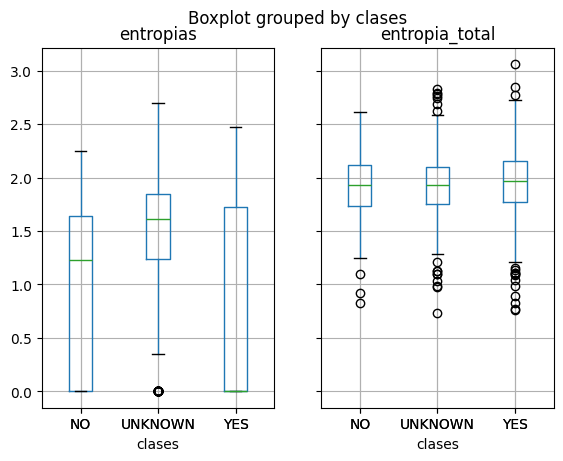

In [5]:
train.boxplot(by="clases",column=["entropias","entropia_total"])

array([<Axes: title={'center': 'entropias'}, xlabel='clases'>,
       <Axes: title={'center': 'entropia_total'}, xlabel='clases'>],
      dtype=object)

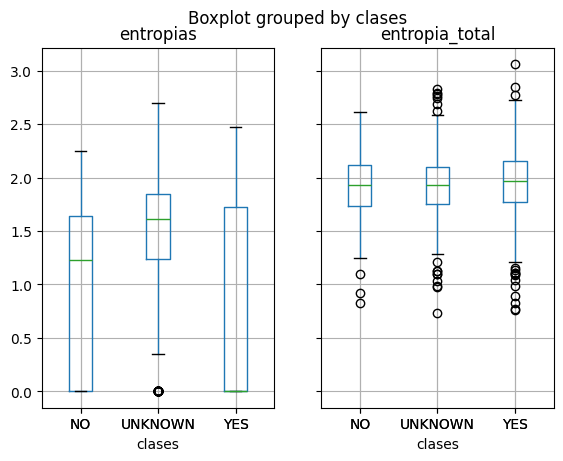

In [6]:
train.boxplot(by="clases",column=["entropias","entropia_total"])

# Integrar características

In [7]:
train["mutinf"]=train["mutinf"]/train["mutinf_t"]
train["max_info"]=train["max_info"]/train["max_info_t"]
#train["mearts"]=train["mearts"]/train["mearts_t"]
#train["entropias"]=train["entropias"]/train["entropia_total"]
train["sumas"]=train["sumas"]/train["sumas_t"]
train["list_m"]=train["list_m"]/train["list_M"]
train=train.drop(["verbT","verbH","KL_divergence","entropia_total","mutinf_t","max_info_t",
                  "mearts_t","sumas_t","list_M"],axis=1)

In [8]:
train["mearts"]=train["mearts"]*train["distancias"]
train=train.drop(["distancias","list_incomp","negH","max_info",'contra','neutral','list_comp','list_T','negT'],axis=1)

In [9]:
train.columns

Index(['entropias', 'mutinf', 'mearts', 'sumas', 'entail', 'no_match',
       'diferencias', 'entropia_relaciones', 'list_m', 'Jaro-Winkler_rit',
       'overlap_ent', 'clases'],
      dtype='object')

In [10]:
for c in train.columns[:-1]:
    # Datos de las calificaciones de los dos grupos
    grupo_a = train[(train['clases']=="UNKNOWN") | (train['clases']=="NO")][c]
    grupo_b = train[(train['clases']=="YES")][c]

    # Realizamos una prueba t de dos muestras independientes
    t_stat, p_valor = ttest_ind(grupo_a, grupo_b)

    # Establecemos un nivel de significancia (alfa)
    alfa = 0.001

    # Comprobamos si rechazamos la hipótesis nula
    if p_valor < alfa:
        #print("Hay una diferencia significativa entre los grupos.",c,p_valor)
        pass
    else:
        print("No hay evidencia de una diferencia significativa entre los grupos.",c)

In [11]:
for c in train.columns[:-1]:
    # Datos de las calificaciones de los dos grupos
    grupo_a = train[(train['clases']=="UNKNOWN") | (train['clases']=="NO")][c]
    grupo_b = train[(train['clases']=="YES")][c]

    # Realizamos una prueba k2 de dos muestras independientes
    stat, p_valor = ks_2samp(grupo_a, grupo_b)

    # Establecemos un nivel de significancia (alfa)
    alfa = 0.001

    # Comprobamos si rechazamos la hipótesis nula
    if p_valor < alfa:
        #print("Hay una diferencia significativa entre los grupos.",c,p_valor)
        pass
    else:
        print("No hay evidencia de una diferencia significativa entre los grupos.",c)

In [12]:
from scipy.stats import mannwhitneyu

for c in train.columns[:-1]:
    # Datos de las calificaciones de los dos grupos
    grupo_a = train[(train['clases']=="UNKNOWN") | (train['clases']=="NO")][c]
    grupo_b = train[(train['clases']=="YES")][c]

    # Realizamos una prueba mannwhitneyu de dos muestras independientes
    stat, p_valor = mannwhitneyu(grupo_a, grupo_b, use_continuity=False)

    # Establecemos un nivel de significancia (alfa)
    alfa = 0.001

    # Comprobamos si rechazamos la hipótesis nula
    if p_valor < alfa:
        #print("Hay una diferencia significativa entre los grupos.",c,p_valor)
        pass
    else:
        print("No hay evidencia de una diferencia significativa entre los grupos.",c)

## Eliminar características

In [13]:
train

,entropias,mutinf,mearts,sumas,entail,no_match,diferencias,entropia_relaciones,list_m,Jaro-Winkler_rit,overlap_ent,clases
0,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.0,0.333333,0.500000,YES
1,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.0,1.000000,0.333333,NO
2,2.177694,0.883974,0.006142,1.394424,0.8,0.2,0.041667,0.721928,0.2,0.800000,0.250000,UNKNOWN
3,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.0,1.000000,0.333333,YES
4,2.192006,1.084191,0.005018,1.012474,0.8,0.2,0.076923,0.721928,0.2,0.600000,0.666667,YES
...,...,...,...,...,...,...,...,...,...,...,...,...
795,1.805037,1.073148,0.003770,1.015625,0.8,0.2,0.062500,0.721928,0.2,0.200000,0.500000,UNKNOWN
796,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.0,1.000000,0.666667,YES
797,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.0,0.333333,0.500000,UNKNOWN
798,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.0,0.400000,1.000000,NO


In [14]:
train.columns

Index(['entropias', 'mutinf', 'mearts', 'sumas', 'entail', 'no_match',
       'diferencias', 'entropia_relaciones', 'list_m', 'Jaro-Winkler_rit',
       'overlap_ent', 'clases'],
      dtype='object')

In [15]:
# Guardar un nuevo dataframe para la correlación de variables
train_m=train.drop(['clases'],axis=1).corr(method='pearson')

In [16]:
train_m

,entropias,mutinf,mearts,sumas,entail,no_match,diferencias,entropia_relaciones,list_m,Jaro-Winkler_rit,overlap_ent
entropias,1.000000,0.917146,0.497135,0.851779,-0.710689,0.638890,0.519442,0.862515,0.708909,-0.371454,-0.307475
mutinf,0.917146,1.000000,0.513012,0.854162,-0.711466,0.648923,0.499856,0.844280,0.710106,-0.372231,-0.326603
mearts,0.497135,0.513012,1.000000,0.372132,-0.452610,0.437670,0.363297,0.532679,0.450033,-0.230654,-0.248024
sumas,0.851779,0.854162,0.372132,1.000000,-0.628803,0.547657,0.441820,0.717792,0.631419,-0.352787,-0.308356
entail,-0.710689,-0.711466,-0.452610,-0.628803,1.000000,-0.949496,-0.750623,-0.829170,-0.994102,0.512361,0.442468
no_match,0.638890,0.648923,0.437670,0.547657,-0.949496,1.000000,0.719580,0.722571,0.938027,-0.490400,-0.426194
diferencias,0.519442,0.499856,0.363297,0.441820,-0.750623,0.719580,1.000000,0.616006,0.766001,-0.397905,-0.329840
entropia_relaciones,0.862515,0.844280,0.532679,0.717792,-0.829170,0.722571,0.616006,1.000000,0.830144,-0.436760,-0.366210
list_m,0.708909,0.710106,0.450033,0.631419,-0.994102,0.938027,0.766001,0.830144,1.000000,-0.507722,-0.439070
Jaro-Winkler_rit,-0.371454,-0.372231,-0.230654,-0.352787,0.512361,-0.490400,-0.397905,-0.436760,-0.507722,1.000000,0.309787


<Axes: >

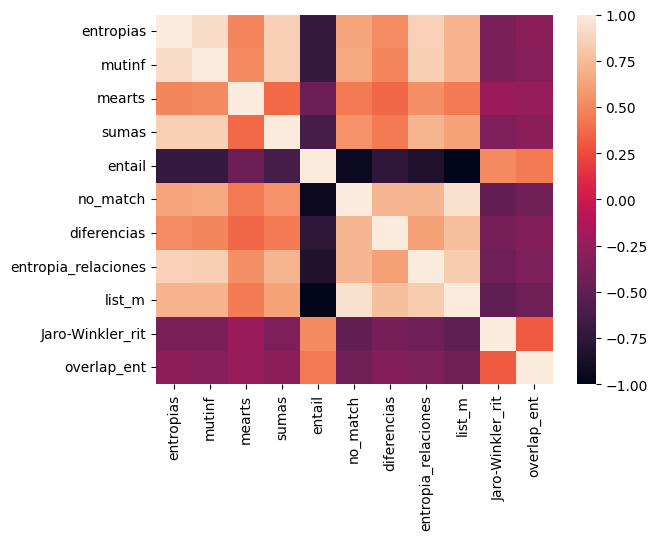

In [17]:
sns.heatmap(train_m,vmin=-1,vmax=1)

In [18]:
train_m

,entropias,mutinf,mearts,sumas,entail,no_match,diferencias,entropia_relaciones,list_m,Jaro-Winkler_rit,overlap_ent
entropias,1.000000,0.917146,0.497135,0.851779,-0.710689,0.638890,0.519442,0.862515,0.708909,-0.371454,-0.307475
mutinf,0.917146,1.000000,0.513012,0.854162,-0.711466,0.648923,0.499856,0.844280,0.710106,-0.372231,-0.326603
mearts,0.497135,0.513012,1.000000,0.372132,-0.452610,0.437670,0.363297,0.532679,0.450033,-0.230654,-0.248024
sumas,0.851779,0.854162,0.372132,1.000000,-0.628803,0.547657,0.441820,0.717792,0.631419,-0.352787,-0.308356
entail,-0.710689,-0.711466,-0.452610,-0.628803,1.000000,-0.949496,-0.750623,-0.829170,-0.994102,0.512361,0.442468
no_match,0.638890,0.648923,0.437670,0.547657,-0.949496,1.000000,0.719580,0.722571,0.938027,-0.490400,-0.426194
diferencias,0.519442,0.499856,0.363297,0.441820,-0.750623,0.719580,1.000000,0.616006,0.766001,-0.397905,-0.329840
entropia_relaciones,0.862515,0.844280,0.532679,0.717792,-0.829170,0.722571,0.616006,1.000000,0.830144,-0.436760,-0.366210
list_m,0.708909,0.710106,0.450033,0.631419,-0.994102,0.938027,0.766001,0.830144,1.000000,-0.507722,-0.439070
Jaro-Winkler_rit,-0.371454,-0.372231,-0.230654,-0.352787,0.512361,-0.490400,-0.397905,-0.436760,-0.507722,1.000000,0.309787


In [19]:
coor=pd.DataFrame(np.tril(train_m,-1),index=train_m.columns,columns=train_m.columns)
coor

,entropias,mutinf,mearts,sumas,entail,no_match,diferencias,entropia_relaciones,list_m,Jaro-Winkler_rit,overlap_ent
entropias,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
mutinf,0.917146,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
mearts,0.497135,0.513012,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
sumas,0.851779,0.854162,0.372132,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
entail,-0.710689,-0.711466,-0.452610,-0.628803,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
no_match,0.638890,0.648923,0.437670,0.547657,-0.949496,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
diferencias,0.519442,0.499856,0.363297,0.441820,-0.750623,0.719580,0.000000,0.000000,0.000000,0.000000,0.0
entropia_relaciones,0.862515,0.844280,0.532679,0.717792,-0.829170,0.722571,0.616006,0.000000,0.000000,0.000000,0.0
list_m,0.708909,0.710106,0.450033,0.631419,-0.994102,0.938027,0.766001,0.830144,0.000000,0.000000,0.0
Jaro-Winkler_rit,-0.371454,-0.372231,-0.230654,-0.352787,0.512361,-0.490400,-0.397905,-0.436760,-0.507722,0.000000,0.0


In [20]:
cols=train_m.columns
temp=coor.copy()
for index, strings in temp.iterrows():
    for c in cols:
        if strings[c]>0.7:
            print(index,c,strings[c])

mutinf entropias 0.9171459345846512
sumas entropias 0.8517792878566465
sumas mutinf 0.8541623074386665
diferencias no_match 0.7195803212048062
entropia_relaciones entropias 0.862514803802475
entropia_relaciones mutinf 0.8442801522837636
entropia_relaciones sumas 0.7177922503475568
entropia_relaciones no_match 0.7225708375793218
list_m entropias 0.7089085289957784
list_m mutinf 0.7101058949509228
list_m no_match 0.9380269228111324
list_m diferencias 0.7660008195989001
list_m entropia_relaciones 0.8301443226443664


In [21]:
cols=train_m.columns
temp=coor.copy()
for index, strings in temp.iterrows():
    for c in cols:
        if strings[c]<-0.7:
            print(index,c,strings[c])

entail entropias -0.7106886066111454
entail mutinf -0.7114660395565107
no_match entail -0.9494962585997344
diferencias entail -0.7506225375443508
entropia_relaciones entail -0.8291698787020491
list_m entail -0.9941017312625572


In [22]:
# Checar variables colineales
#sns.relplot(data=train_m, x="mutinf", y="sumas")

In [23]:
train=train.drop(["entail","list_m"],axis=1)

In [24]:
train.columns

Index(['entropias', 'mutinf', 'mearts', 'sumas', 'no_match', 'diferencias',
       'entropia_relaciones', 'Jaro-Winkler_rit', 'overlap_ent', 'clases'],
      dtype='object')

In [25]:
X = train.drop(['clases'],axis=1)
y_ = train['clases']

In [26]:
# RTE3
y_train=[]
for i in y_:
    if i == "YES":
        y_train.append(1)
    else:
        y_train.append(0)

In [27]:
scaler = preprocessing.MaxAbsScaler().fit(X)
X_scaled = scaler.transform(X)
X = X_scaled
X_train=X

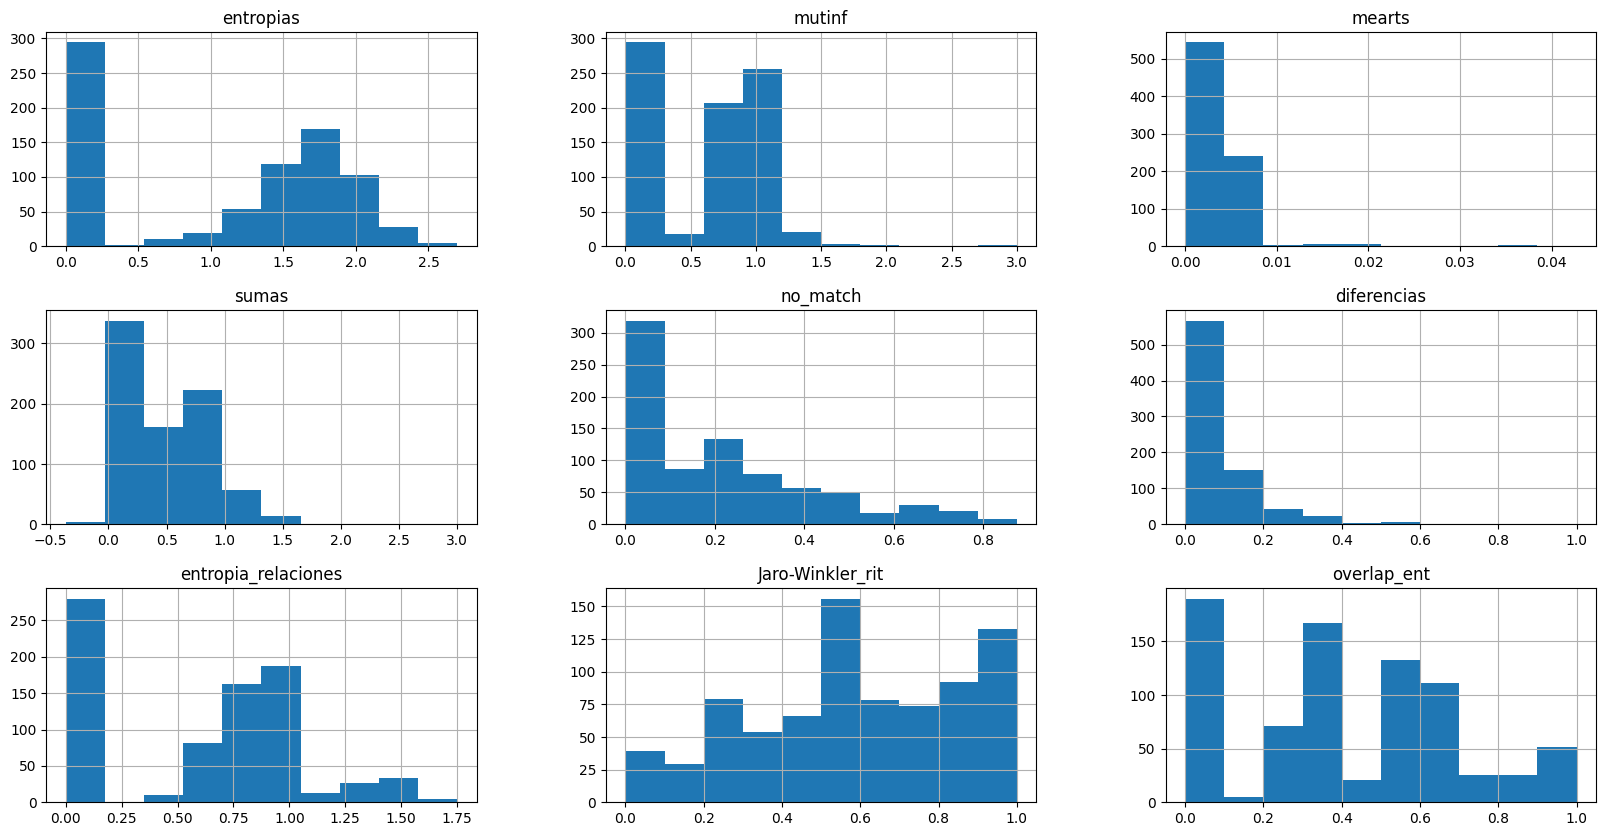

In [28]:
train.hist(figsize=(20,10))
plt.show()

# TEST

In [29]:
for i in range(8):
    if i==0:
        test = pd.read_pickle('salida/nuevo4g/RTE3/TEST_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo4g/RTE3/TEST_'+str(i+1)+'.csv_.pickle')
            test=pd.concat([test,temp])
        except:
            pass

In [30]:
test = test.reset_index(drop=True)
test

,distancias,entropia_total,entropias,mutinf,mearts,max_info,sumas,mutinf_t,mearts_t,max_info_t,...,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,verbT,negH,verbH,overlap_ent,clases
0,0.000000,2.230984,0.000000,0.000000,0.000000,0.000000,0.000000,4.434350,0.000691,0.858036,...,0,24,0.400000,0.000000,0,,0,,0.666667,YES
1,0.000000,2.068941,0.000000,0.000000,0.000000,0.000000,0.000000,4.429481,0.000576,0.885372,...,0,24,0.800000,0.000000,0,,0,,0.333333,YES
2,0.000000,1.764581,0.000000,0.000000,0.000000,0.000000,0.000000,3.155371,0.000000,0.750000,...,0,14,0.500000,0.000000,0,,0,,0.666667,YES
3,0.000000,2.011711,0.000000,0.000000,0.000000,0.000000,0.000000,3.957290,0.000000,0.833333,...,0,20,0.666667,0.000000,0,,0,,1.000000,YES
4,1.000001,1.690627,1.860964,3.880129,0.004272,0.201056,0.060806,3.339943,0.000845,0.550264,...,1,20,0.000000,0.597443,0,,0,,1.000000,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.841464,2.198445,2.205827,3.861241,0.004049,0.631889,0.131074,4.383406,0.001461,0.852755,...,2,19,0.400000,0.167645,1,rush,0,,0.500000,YES
796,0.000000,1.580490,0.000000,0.000000,0.000000,0.000000,0.000000,3.178976,0.000000,0.666667,...,0,25,0.666667,0.000000,0,,0,,0.333333,NO
797,0.000000,1.828157,0.000000,0.000000,0.000000,0.000000,0.000000,4.789178,0.000000,1.000000,...,0,24,0.000000,0.000000,0,,0,,0.666667,UNKNOWN
798,1.319180,1.766603,0.881291,3.781196,0.005778,0.129923,0.036628,4.466536,0.001000,0.782481,...,1,10,0.500000,0.339799,0,,0,,0.666667,UNKNOWN


In [31]:
test["mutinf"]=test["mutinf"]/test["mutinf_t"]
test["max_info"]=test["max_info"]/test["max_info_t"]
#train["mearts"]=train["mearts"]/train["mearts_t"]
#train["entropias"]=train["entropias"]/train["entropia_total"]
test["sumas"]=test["sumas"]/test["sumas_t"]
test["list_m"]=test["list_m"]/test["list_M"]
test=test.drop(["verbT","verbH","KL_divergence","entropia_total","mutinf_t","max_info_t",
                  "mearts_t","sumas_t","list_M"],axis=1)
test["mearts"]=test["mearts"]*test["distancias"]
test=test.drop(["distancias","list_incomp","negH","max_info",'contra','neutral','list_comp','list_T','negT','entail','list_m'],axis=1)

In [32]:
X_t = test.drop(['clases'],axis=1)
y_t = test['clases']

In [33]:
# RTE3
y_test=[]
for i in y_t:
    if i == "YES":
        y_test.append(1)
    else:
        y_test.append(0)

In [34]:
scaler = preprocessing.MaxAbsScaler().fit(X_t)
X_scaled = scaler.transform(X_t)
X_test = X_scaled

# MODELO DE REGRESIÓN LÓGISTICA

In [35]:
X_train = np.where(np.isnan(X_train), 0, X_train)
X_train

array([[0.        , 0.        , 0.        , ..., 0.        , 0.33333333,
        0.5       ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.33333333],
       [0.80744617, 0.29465798, 0.14374796, ..., 0.41253034, 0.8       ,
        0.25      ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.33333333,
        0.5       ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.4       ,
        1.        ],
       [0.64046162, 0.29169805, 0.07279356, ..., 0.41253034, 0.8       ,
        0.66666667]])

In [36]:
X_train.shape

(800, 9)

In [37]:
model = LogisticRegression(penalty="l2", C=1)
model.fit(X_train,y_train)

LogisticRegression(C=1)

In [38]:
model.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [39]:
model.decision_function(X_train)

array([ 0.71809273,  1.2304029 ,  0.76285923,  1.2304029 ,  0.74148848,
        1.25560139,  0.75708487, -1.13334186,  0.97844529, -1.46783061,
       -0.02728222,  0.71641374,  1.29087382,  0.17014892, -0.97035788,
        0.84826901,  0.27922344,  0.30544882, -0.45562173,  0.30553033,
        1.27179749,  0.18781485,  0.86588432,  1.19680946,  0.94605308,
       -0.15002195,  0.95325226, -1.04811221,  0.56811667, -0.34861191,
        1.2196055 ,  0.41128687,  0.71809273,  1.03723722,  0.91007515,
        0.39894824,  1.48236051,  0.41076494,  0.1474487 ,  1.35638171,
        0.97844529,  0.18037187,  0.65930081,  0.11788405, -0.5855169 ,
        1.28991443,  0.51232781,  1.08282929,  0.70399488,  0.91125841,
       -0.57046524,  0.99104454, -1.27563099,  1.25560139,  0.65594282,
        0.44474194,  0.99104454,  0.92805513,  0.76428541, -0.57658734,
        0.39894824, -0.21858849,  1.00364378,  1.12154016,  1.29087382,
        0.75168617,  1.1674135 , -0.62245064,  0.91125841,  0.05

In [40]:
labels=train.columns[:-1]
labels

Index(['entropias', 'mutinf', 'mearts', 'sumas', 'no_match', 'diferencias',
       'entropia_relaciones', 'Jaro-Winkler_rit', 'overlap_ent'],
      dtype='object')

In [41]:
model.classes_

array([0, 1])

In [42]:
model.coef_[0]

array([ 1.11567798, -0.06240928, -0.76799514,  1.08624996, -2.52270128,
       -0.80828831, -2.1325262 ,  0.95743346,  0.75587282])

In [43]:
coeficientes=model.coef_[0]

In [44]:
coeficientes

array([ 1.11567798, -0.06240928, -0.76799514,  1.08624996, -2.52270128,
       -0.80828831, -2.1325262 ,  0.95743346,  0.75587282])

In [45]:
print("Maximo,minimo ",np.argmax(coeficientes),labels[np.argmax(coeficientes)],np.argmin(coeficientes),labels[np.argmin(coeficientes)])

Maximo,minimo  0 entropias 4 no_match


In [46]:
n_columns=train.shape[1]-1

In [47]:
n_columns

9

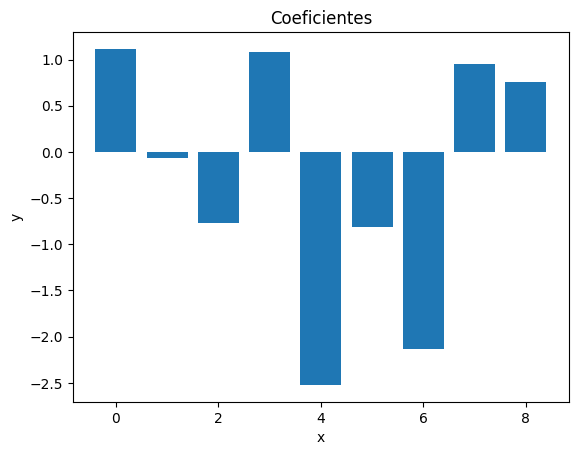

In [48]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = coeficientes

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coeficientes')
plt.show()

In [49]:
X_test = np.where(np.isnan(X_test), 0, X_test)
X_test

array([[0.        , 0.        , 0.        , ..., 0.        , 0.4       ,
        0.66666667],
       [0.        , 0.        , 0.        , ..., 0.        , 0.8       ,
        0.33333333],
       [0.        , 0.        , 0.        , ..., 0.        , 0.5       ,
        0.66666667],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.66666667],
       [0.32312239, 0.2821871 , 0.17518758, ..., 0.42211679, 0.5       ,
        0.66666667],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        1.        ]])

In [50]:
X_test.shape

(800, 9)

In [51]:
predictions = model.predict(X_test)

In [52]:
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,

In [53]:
test["predicciones"]=predictions
test

,entropias,mutinf,mearts,sumas,no_match,diferencias,entropia_relaciones,Jaro-Winkler_rit,overlap_ent,clases,predicciones
0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.400000,0.666667,YES,1
1,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.800000,0.333333,YES,1
2,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.500000,0.666667,YES,1
3,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.666667,1.000000,YES,1
4,1.860964,1.161735,0.004272,0.939170,0.25,0.050000,0.811278,0.000000,1.000000,NO,1
...,...,...,...,...,...,...,...,...,...,...,...
795,2.205827,0.880877,0.003407,1.187038,0.00,0.105263,0.721928,0.400000,0.500000,YES,1
796,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.666667,0.333333,NO,1
797,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.666667,UNKNOWN,1
798,0.881291,0.846561,0.007622,0.316275,0.25,0.100000,0.811278,0.500000,0.666667,UNKNOWN,0


In [54]:
incorrectos = test[(test["clases"]=="YES") & (test["predicciones"]==0)]
incorrectos

,entropias,mutinf,mearts,sumas,no_match,diferencias,entropia_relaciones,Jaro-Winkler_rit,overlap_ent,clases,predicciones
32,0.836641,1.149701e+00,0.005280,0.256664,0.250000,0.066667,0.811278,0.500000,0.666667,YES,0
42,0.000000,3.027751e-13,0.038240,0.000000,0.142857,0.052632,0.591673,0.428571,0.500000,YES,0
67,1.190526,9.012922e-01,0.004087,0.265451,0.500000,0.111111,1.000000,0.500000,0.333333,YES,0
68,1.094914,1.081933e+00,0.006622,-0.003641,0.200000,0.071429,0.721928,0.400000,0.333333,YES,0
81,1.413582,9.329900e-01,0.008265,0.133775,0.285714,0.166667,0.863121,0.428571,0.666667,YES,0
...,...,...,...,...,...,...,...,...,...,...,...
712,1.456565,9.526118e-01,0.005786,0.526487,0.200000,0.066667,0.721928,0.600000,0.000000,YES,0
720,1.378783,1.151356e+00,0.004199,0.474069,0.200000,0.142857,0.721928,0.000000,0.666667,YES,0
738,1.391836,8.991101e-01,0.003988,0.610175,0.285714,0.166667,0.863121,0.714286,0.500000,YES,0
743,1.521815,8.927049e-01,0.004963,0.442974,0.352941,0.375000,0.936667,0.235294,0.375000,YES,0


In [55]:
print(confusion_matrix(y_test, predictions))

[[211 179]
 [ 79 331]]


In [263]:
# [[225 165]
#  [ 92 318]]
# [[236 154]
#  [106 304]]
# [[239 151]
#  [124 286]]
# acccuracy:  0.66
# precision:  0.65
# recall 0.7
# f1_score:  0.68
# matthews_score:  0.31
# acccuracy:  0.68
# precision:  0.66
# recall 0.74
# f1_score:  0.7
# matthews_score:  0.35

In [56]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions),2))
print("recall",round(recall_score(y_test,predictions),2))
print("f1_score: ",round(f1_score(y_test,predictions),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.68
precision:  0.65
recall 0.81
f1_score:  0.72
matthews_score:  0.36


In [265]:
# acccuracy:  0.68
# precision:  0.65
# recall 0.79
# f1_score:  0.71
# matthews_score:  0.35

In [57]:
X_train.shape

(800, 9)

In [58]:
X_test.shape

(800, 9)

In [59]:
X_cv=np.concatenate((X_train, X_test), axis=0)
Y_cv=np.concatenate((y_train, y_test), axis=0)

In [60]:
#validation_size = 0.20
#X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)
X_train_cv=X_cv
Y_train_cv=Y_cv

In [61]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name + " Acurracy:" , round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg += "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression Acurracy:: 0.700000 (0.108764)
Logistic Regression Precision:: 0.710000 (0.117806)
Logistic Regression Recall:: 0.780000 (0.079315)
Logistic Regression F1-score:: 0.740000 (0.070009)


In [ ]:
# Logistic Regression Acurracy:: 0.710000 (0.106147)
# Logistic Regression Precision:: 0.720000 (0.118139)
# Logistic Regression Recall:: 0.790000 (0.081470)
# Logistic Regression F1-score:: 0.740000 (0.066817)

In [ ]:
# Logistic Regression Acurracy:: 0.710000 (0.114844)
# Logistic Regression Precision:: 0.720000 (0.121810)
# Logistic Regression Recall:: 0.800000 (0.084588)
# Logistic Regression F1-score:: 0.740000 (0.073147

In [62]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_weighted')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_weighted')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_weighted')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Precision:: 0.710000 (0.112403)
Logistic Regression Recall:: 0.700000 (0.108764)
Logistic Regression F1-score:: 0.690000 (0.131329)


In [63]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_macro')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_macro')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_macro')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Precision:: 0.710000 (0.112306)
Logistic Regression Recall:: 0.700000 (0.113816)
Logistic Regression F1-score:: 0.690000 (0.134168)


In [273]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_micro')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_micro')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_micro')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Precision:: 0.700000 (0.108764)
Logistic Regression Recall:: 0.700000 (0.108764)
Logistic Regression F1-score:: 0.700000 (0.108764)


In [274]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='matthews_corrcoef')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.390000 (0.240695)


In [275]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [56]:
#linear_model

In [81]:
#model = LogisticRegression()
#model.fit(X_train,y_train)

In [64]:
y_predict = model.predict(X_test)
print(classification_report( y_test,y_predict))

              precision    recall  f1-score   support

           0       0.73      0.54      0.62       390
           1       0.65      0.81      0.72       410

    accuracy                           0.68       800
   macro avg       0.69      0.67      0.67       800
weighted avg       0.69      0.68      0.67       800



In [ ]:
precision    recall  f1-score   support

           0       0.69      0.61      0.64       390
           1       0.66      0.74      0.70       410

    accuracy                           0.68       800
   macro avg       0.68      0.67      0.67       800
weighted avg       0.68      0.68      0.67       800

In [277]:
explainer = shap.Explainer(model,X_train,feature_names=test.columns[:-2])
shap_values = explainer(X_test)

In [278]:
test.columns[:-2]

Index(['entropias', 'mutinf', 'mearts', 'sumas', 'no_match', 'diferencias',
       'entropia_relaciones', 'Jaro-Winkler_rit', 'overlap_ent'],
      dtype='object')

In [279]:
explainer.expected_value

-0.19671023739858115

In [280]:
X_test

array([[0.        , 0.        , 0.        , ..., 0.        , 0.4       ,
        0.66666667],
       [0.        , 0.        , 0.        , ..., 0.        , 0.8       ,
        0.33333333],
       [0.        , 0.        , 0.        , ..., 0.        , 0.5       ,
        0.66666667],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.66666667],
       [0.32312239, 0.2821871 , 0.17518758, ..., 0.42211679, 0.5       ,
        0.66666667],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        1.        ]])

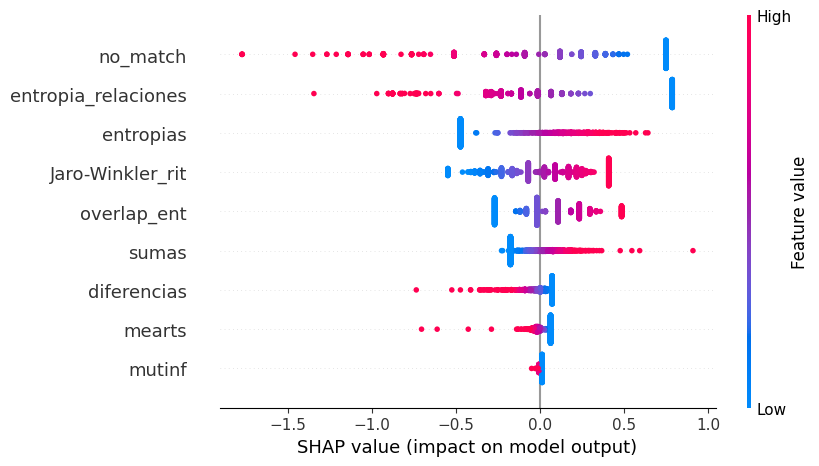

In [281]:
shap.plots.beeswarm(shap_values)

[0.54671232 0.34684775 0.12872415 0.15206629 0.2        0.05454545
 0.37562701 0.8        0.33333333] 0 1


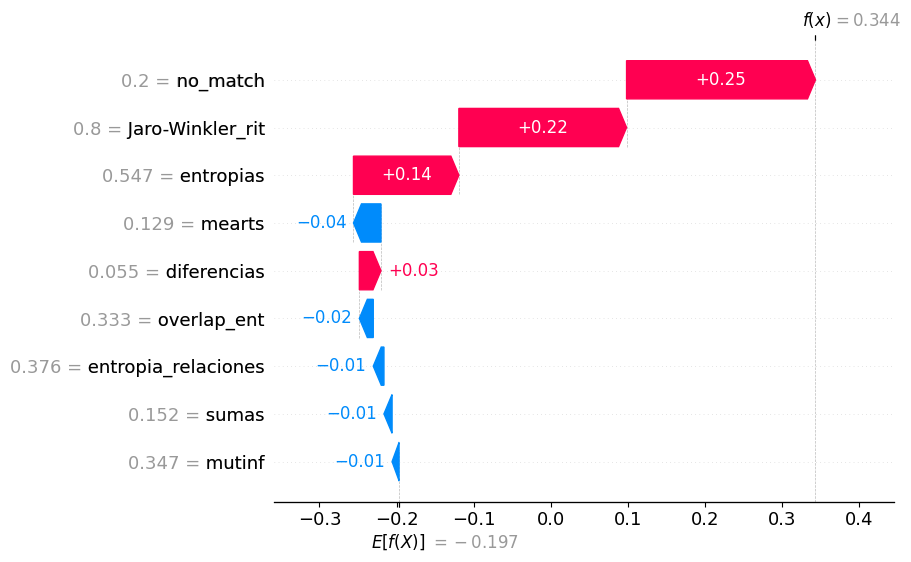

In [282]:
ind = 21
print(X_test[ind],y_test[ind],y_predict[ind])
shap.plots.force(shap_values[ind])
shap.plots.waterfall(shap_values[ind])

In [283]:
ind = 6
print(X_test[ind])
# This amazing documentary gives us a glimpse into the lives of the brave
# women in Cameroun's judicial system-- policewomen, lawyers and judges. Despite
# tremendous difficulties-- lack of means, the desperate poverty of the people, multiple
# languages and multiple legal precedents depending on the region of the country and
# the religious/ethnic background of the plaintiffs and defendants-- these brave,
# strong women are making a difference. [...]

shap.plots.waterfall(shap_values[ind,:,1])

[0.         0.         0.         0.         0.         0.
 0.         1.         0.66666667]


IndexError: index 1 is out of bounds for axis 2 with size 1

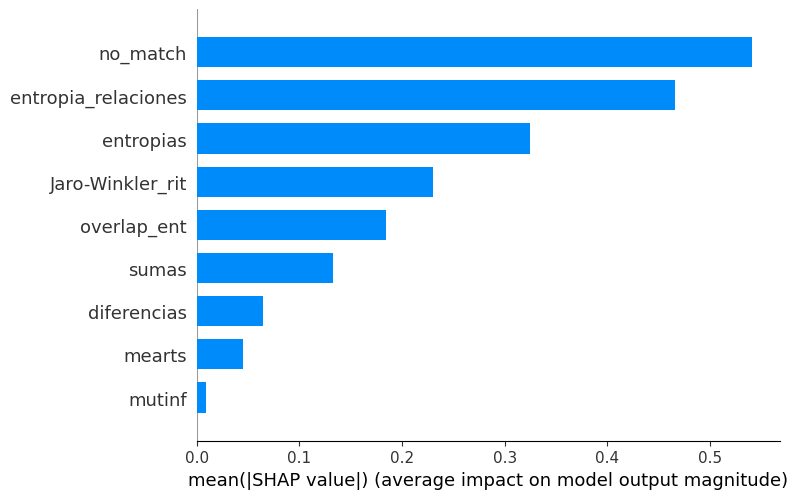

In [284]:
shap.summary_plot(shap_values, X_test,plot_type="bar")

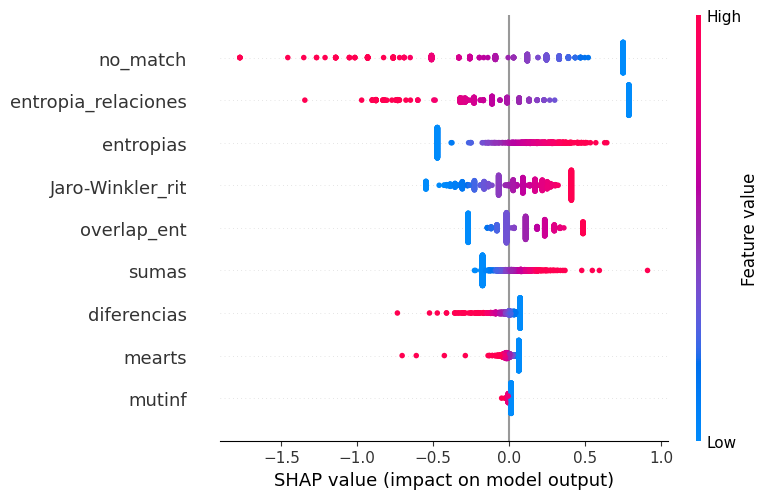

In [291]:
shap.summary_plot(shap_values[:,:,0])

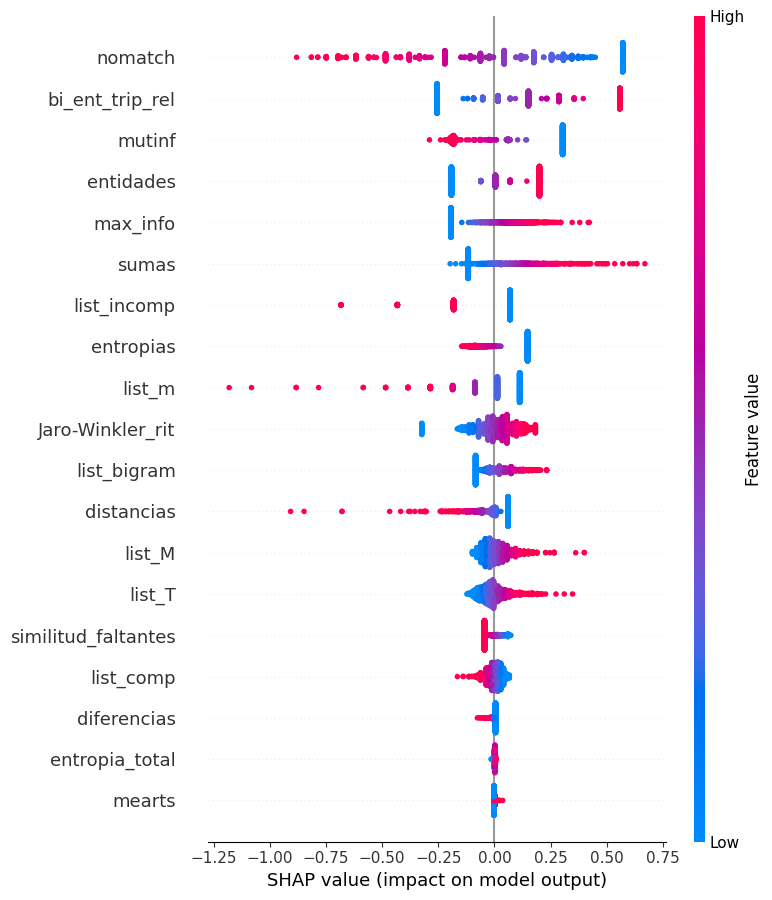

In [97]:
shap.summary_plot(shap_values, X_test,feature_names=test.columns[:-1])

In [ ]:
shap_values[2:,]

.values =
array([[ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [-0.01299836, -0.11268555, -0.4045574 ,  0.04382668,  0.21114683],
       ...,
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683]])

.base_values =
array([-0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.745

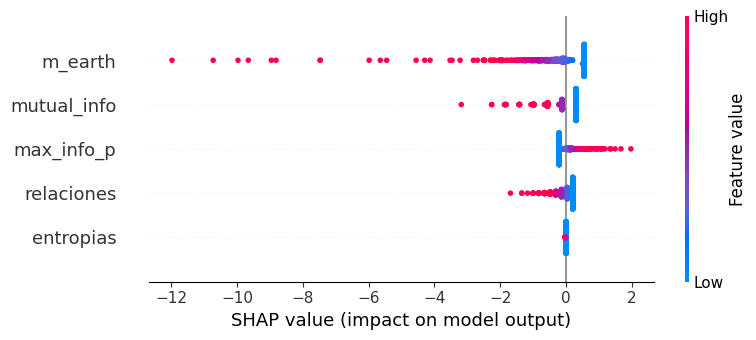

In [ ]:
shap.summary_plot(shap_values[0:,], X_test,feature_names=test.columns[:-1])

In [ ]:
explainer.expected_value

-0.7454438806409415

In [ ]:
shap_values.shape

(800, 5)

# Árbol de decisión

In [197]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [204]:
clf = DecisionTreeClassifier(splitter="random",criterion='entropy')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [205]:
print("acccuracy: ",round(accuracy_score(y_test,y_pred),2))
print("precision: ",round(precision_score(y_test,y_pred),2))
print("recall",round(recall_score(y_test,y_pred),2))
print("f1_score: ",round(f1_score(y_test,y_pred),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,y_pred),2))

acccuracy:  0.65
precision:  0.64
recall 0.72
f1_score:  0.68
matthews_score:  0.3


In [206]:
validation_size = 0.01
X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)

In [207]:
name='DecisionTree'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

DecisionTree: 0.620000 (0.038039)
DecisionTree: 0.630000 (0.036153)
DecisionTree: 0.680000 (0.060250)
DecisionTree: 0.650000 (0.030989)


In [202]:
c=train.columns[:-1]
confusion_matrix(y_test,y_pred)

array([[256, 134],
       [183, 227]])

Profundidad del árbol: 22
Número de nodos terminales: 278


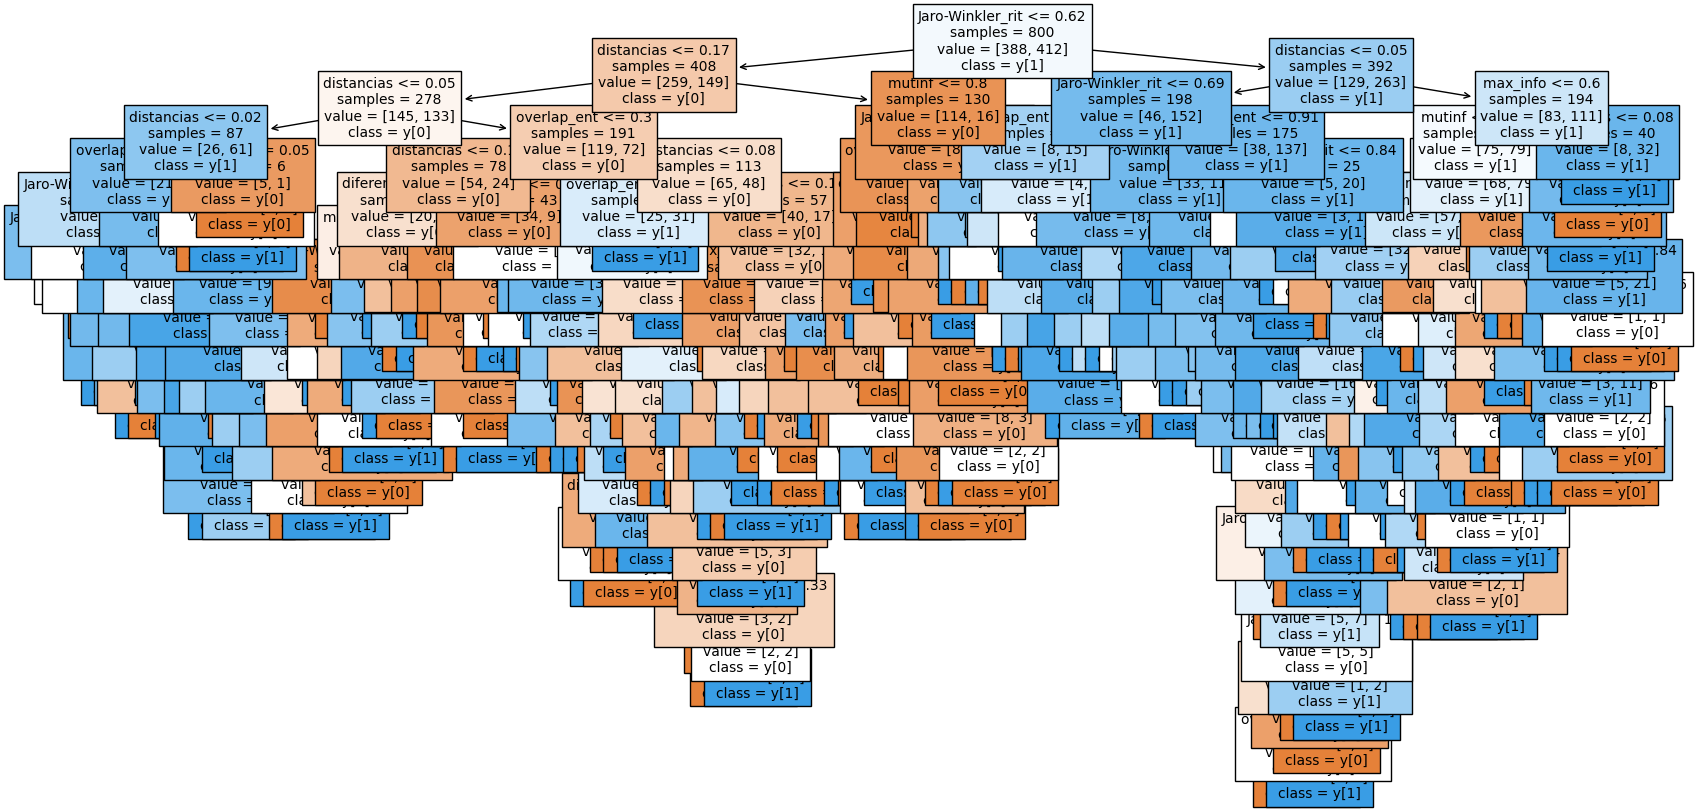

In [203]:
# Estructura del árbol creado
import matplotlib.pyplot as plt
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(20, 10))

print(f"Profundidad del árbol: {clf.get_depth()}")
print(f"Número de nodos terminales: {clf.get_n_leaves()}")

plot = plot_tree(
            decision_tree = clf,
            feature_names = c,
            class_names   = True,
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )